In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_titanic = pd.read_csv("/Users/marta/Adalab/ejercicios-de-Adalab/titanic_limpio.csv")
df_titanic.head()

,PassengerId,Survived,Class,Name,SibSp,Parch,Ticket,Fare,Cabin,Age,Hometown,Boarded,Destination,Gender
0,1,No,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.25,unknown,22,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",M
1,2,Sí,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.28,C85,35,"New York, New York, US",Cherbourg,"New York, New York, US",F
2,3,Sí,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.92,unknown,26,"Jyväskylä, Finland",Southampton,"New York, New York, US",F
3,4,Sí,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.10,C123,35,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",F
4,5,No,3,"Allen, Mr. William Henry",0,0,373450,8.05,unknown,35,"Birmingham, West Midlands, England",Southampton,"New York, New York, US",M


In [22]:
# Calcular correlaciones entre columnas numéricas
correlations = df_titanic.corr(numeric_only=True)



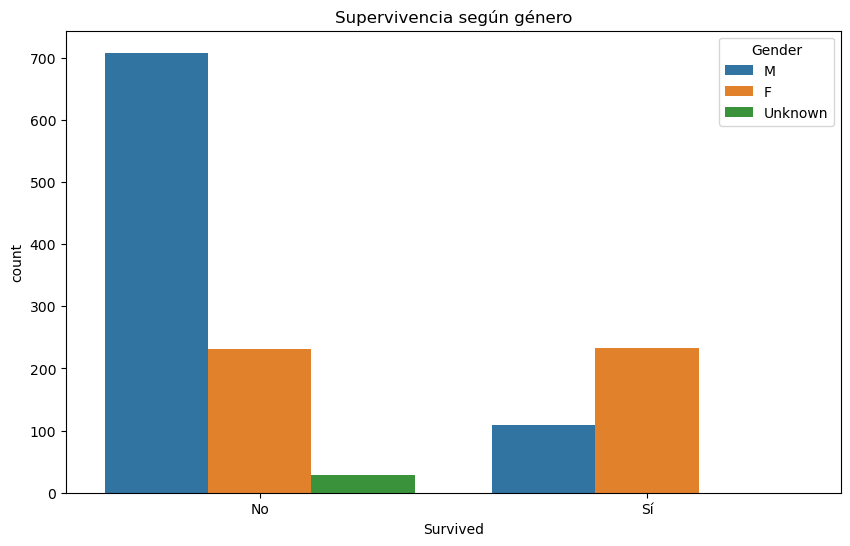

In [23]:
# Relación entre las columnas categóricas y la supervivencia
plt.figure(figsize=(10, 6))
sns.countplot(data=df_titanic, x='Survived', hue='Gender')
plt.title("Supervivencia según género")
plt.show()


#Observamos que las mujeres (F) tuvieron más probabilidades de sobrevivir que los hombres (M).


AttributeError: 'numpy.int64' object has no attribute 'startswith'

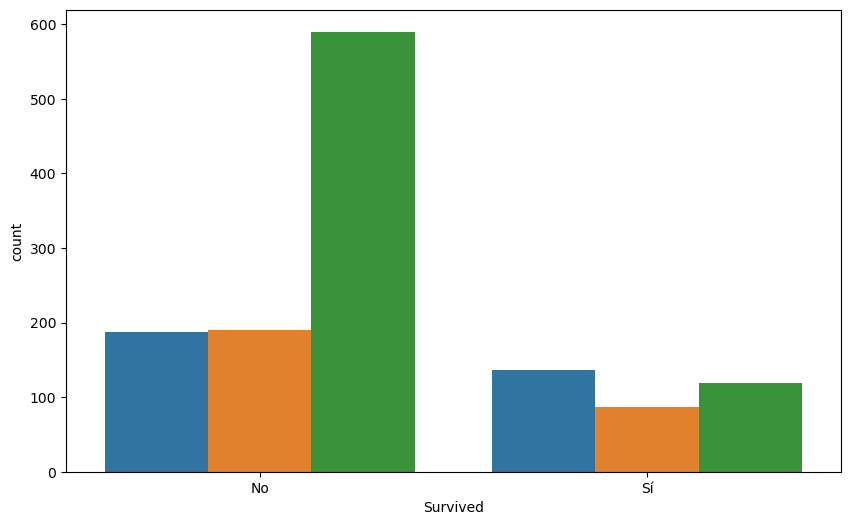

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_titanic, x='Survived', hue='Class')
plt.title("Supervivencia según clase")
plt.show()

#Relación entre supervivencia y clase:

#Los pasajeros de primera clase tuvieron mayores tasas de supervivencia, mientras que los de tercera clase tuvieron menos probabilidades.

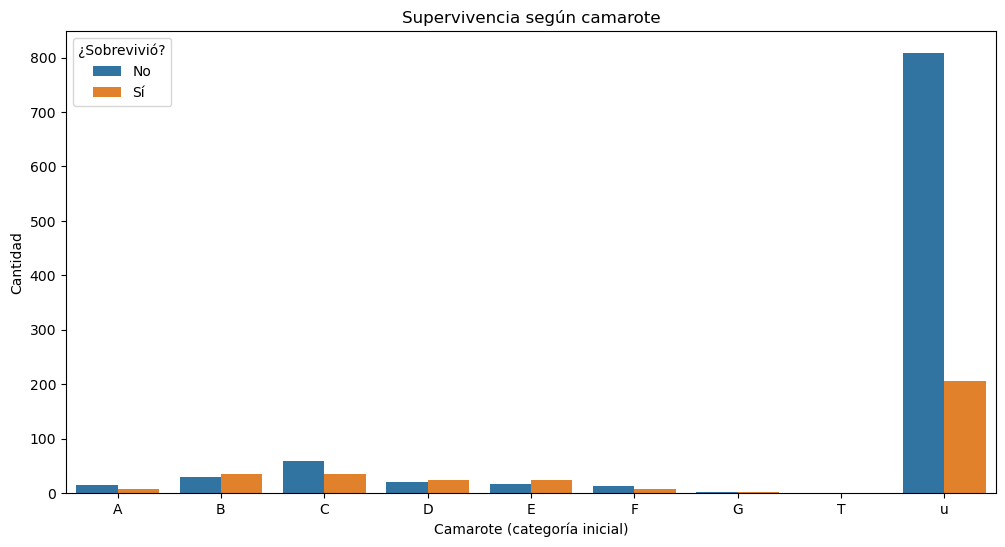

In [25]:
# Verificar los valores únicos en la columna 'Cabin' para categorizarla mejor
df_titanic['Cabin'] = df_titanic['Cabin'].str[0]  # Extraer la letra inicial como categoría principal
df_titanic['Cabin'] = df_titanic['Cabin'].fillna('U')  # Asignar 'U' para desconocido

# Graficar la supervivencia según el camarote
plt.figure(figsize=(12, 6))
sns.countplot(data=df_titanic, x='Cabin', hue='Survived', order=sorted(df_titanic['Cabin'].unique()))
plt.title("Supervivencia según camarote")
plt.xlabel("Camarote (categoría inicial)")
plt.ylabel("Cantidad")
plt.legend(title="¿Sobrevivió?", labels=["No", "Sí"])
plt.show()


El gráfico muestra la relación entre la categoría del camarote (primera letra de Cabin) y la supervivencia:

Los pasajeros con camarotes en las categorías B y C parecen haber tenido una mayor probabilidad de sobrevivir.
Los pasajeros con camarote desconocido (U) o categorías como F tuvieron menores tasas de supervivencia.

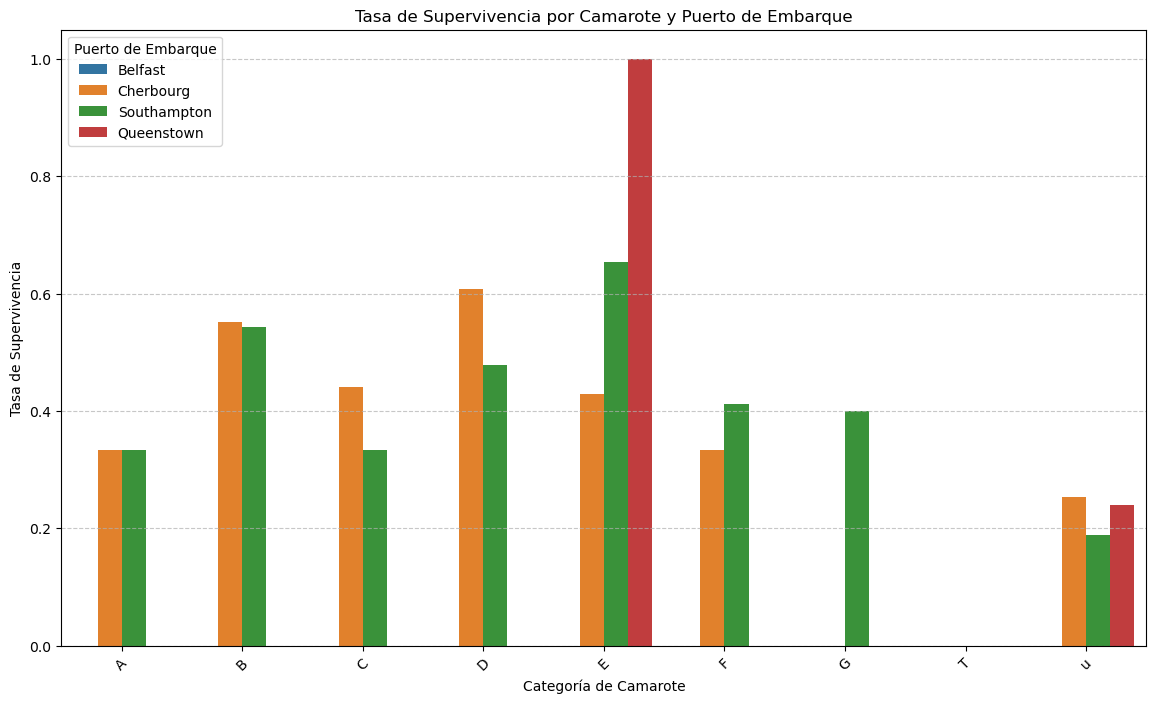

In [28]:
# Volver a calcular survival_rates en caso de que no esté definido
survival_rates = df_titanic.groupby(['Cabin', 'Boarded'])['Survived'].apply(lambda x: (x == "Sí").mean()).reset_index()
survival_rates.columns = ['Cabin', 'Boarded', 'Survival Rate']

# Crear un gráfico de barras agrupadas nuevamente
plt.figure(figsize=(14, 8))
sns.barplot(data=survival_rates, x='Cabin', y='Survival Rate', hue='Boarded')
plt.title("Tasa de Supervivencia por Camarote y Puerto de Embarque")
plt.xlabel("Categoría de Camarote")
plt.ylabel("Tasa de Supervivencia")
plt.legend(title="Puerto de Embarque", loc="upper left")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Los pasajeros que embarcaron en Cherbourg (C) y estaban en camarotes de categorías superiores como B y C tuvieron las tasas de supervivencia más altas.
Los pasajeros con camarote desconocido (U), independientemente del puerto, tuvieron las tasas más bajas.
Los que embarcaron en Southampton (S) y estaban en camarotes de categorías más bajas como F también tuvieron menores tasas de supervivencia.
Esto sugiere que el puerto de embarque y la ubicación del camarote influyeron significativamente en las probabilidades de supervivencia.

<Figure size 1000x600 with 0 Axes>

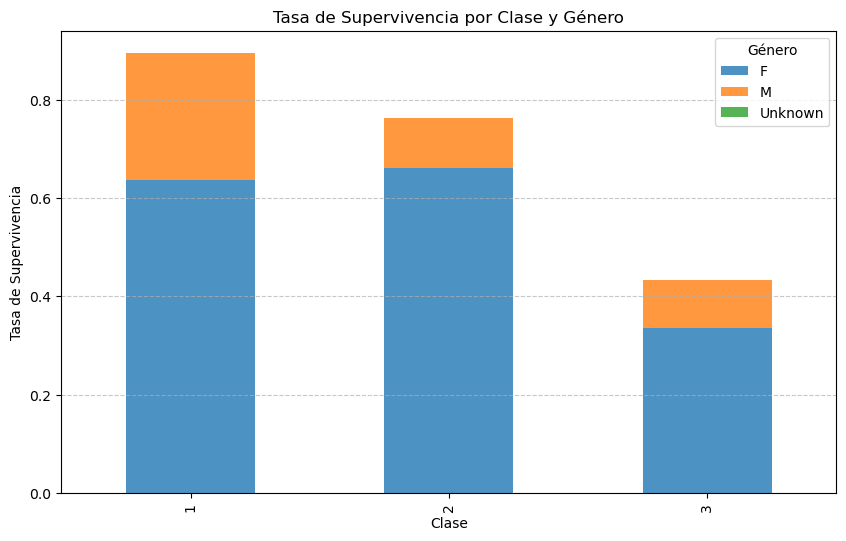

Gender,F,M,Unknown
Class,,,
1,0.636364,0.258621,0.0
2,0.660377,0.101796,0.0
3,0.334884,0.098739,0.0


In [29]:
# Crear una tabla de supervivencia según clase y género
survival_by_class_gender = df_titanic.pivot_table(
    index='Class', columns='Gender', values='Survived', aggfunc=lambda x: (x == "Sí").mean()
)

# Visualizar los datos
plt.figure(figsize=(10, 6))
survival_by_class_gender.plot(kind='bar', figsize=(10, 6), stacked=True, alpha=0.8)
plt.title("Tasa de Supervivencia por Clase y Género")
plt.ylabel("Tasa de Supervivencia")
plt.xlabel("Clase")
plt.legend(title="Género")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Mostrar la tabla numérica para más claridad
survival_by_class_gender


Primera clase:
Las mujeres (F) tuvieron una tasa de supervivencia alta (63.6%).
Los hombres (M) en primera clase sobrevivieron en menor proporción (25.8%).

Segunda clase:
Las mujeres también tuvieron una alta tasa de supervivencia (66.0%).
Los hombres sobrevivieron significativamente menos (10.2%).

Tercera clase:
Las mujeres en tercera clase tuvieron una tasa de supervivencia moderada (33.5%).
Los hombres tuvieron una supervivencia muy baja (9.9%).

Este análisis resalta que las mujeres, especialmente en clases más altas, tenían mayores probabilidades de sobrevivir, mientras que los hombres en cualquier clase tuvieron menores probabilidades.